## Estadística Aplicada

Sesión 7 - 05 septiembre

Karla Mariana Ley Acero - 2076201

Grupo 42

In [1]:
## Librerias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## Libreria especializada
# Libreria especializada en modelos de supervivencia

## Para instalar lifelines
# !pip install lifelines

from lifelines import ExponentialFitter

In [4]:
## Importar los datos
## Ejercicio del modelo exponencial que hicimos a mano 

recaida = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/ejercicio_expo.csv')

In [5]:
recaida

,Paciente,tiempo,estado
0,1,5,1
1,2,8,1
2,3,12,1
3,4,24,1
4,5,32,1
5,6,17,1
6,7,16,0
7,8,17,0
8,9,19,0
9,10,30,0


In [43]:
## Calcular la exponencial 
# fit(tiempo de supervivencia, censura) sirve para estimar 
#AIC es el criterio de Akaike
exponen = ExponentialFitter().fit(recaida [' tiempo'], recaida[' estado'])

In [7]:
exponen.print_summary()

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 10 total observations, 4 right-censored observations>
   number of observations = 10
number of events observed = 6
           log-likelihood = -26.41
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  30.00      12.25             6.00            54.00

          cmp to    z    p   -log2(p)
lambda_     0.00 2.45 0.01       6.13
---
AIC = 54.81

In [8]:
# a) tasa de riesgo 
## hazard_ es para obtener esta tasa, la cual es 0.0333 = 3.33%
exponen.hazard_

,Exponential_estimate
5.0,0.033333
8.0,0.033333
11.0,0.033333
14.0,0.033333
17.0,0.033333
20.0,0.033333
23.0,0.033333
26.0,0.033333
29.0,0.033333
32.0,0.033333


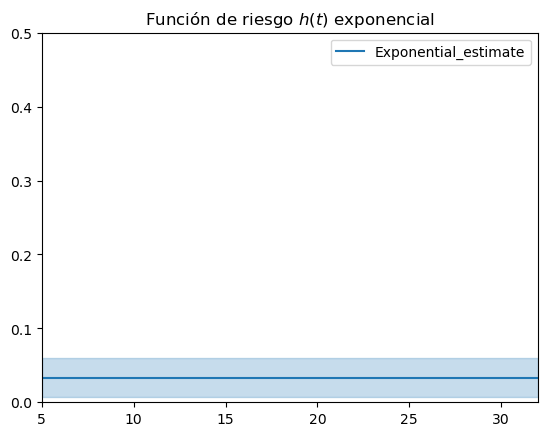

In [16]:
## Graficar h(t)

exponen.plot_hazard();
plt.title ('Función de riesgo $h(t)$ exponencial')
plt.xlim(5,32)
plt.ylim(0,.5);

In [17]:
# b) La probabilidad de no reacer en 16 meses 
# S(16)

exponen.survival_function_at_times(16)

16    0.586646
Name: Exponential_estimate, dtype: float64

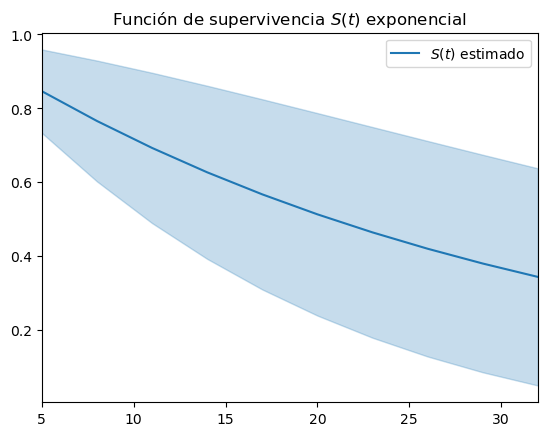

In [20]:
## Grafica de la función de supervivencia de la exponencial
# se pone el suvival_function porque es donde lo fuardamos
# Las areas sombreadas es el nivel de confianza al 95%

exponen.plot_survival_function(label = '$S(t)$ estimado')
plt.title('Función de supervivencia $S(t)$ exponencial')
plt.xlim(5,32);

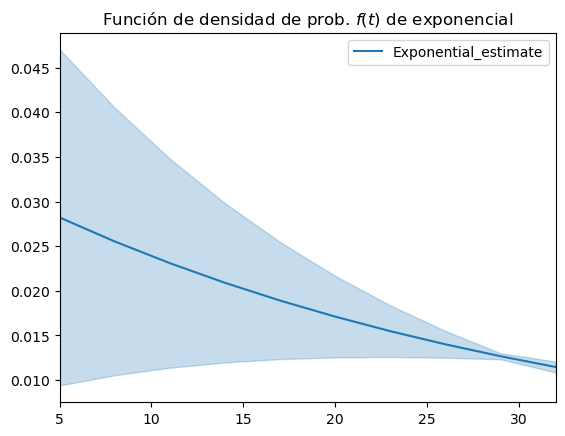

In [22]:
## f(t), función de densidad de probabilidad
# density es la funcion de densidad

exponen.plot_density()
plt.title('Función de densidad de prob. $f(t)$ de exponencial')
plt.xlim(5,32);

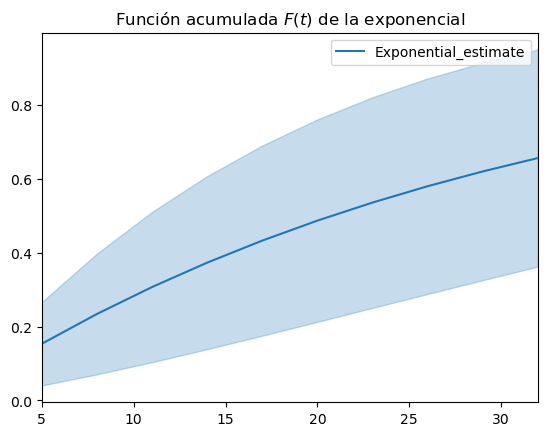

In [24]:
## F(t), es la acumulada

exponen.plot_cumulative_density()
plt.title('Función acumulada $F(t)$ de la exponencial')
plt.xlim(5,32);

Vamos a suponer que el tiempo de supervivencia de los datos se distribuyen como una **Weibull**

In [25]:
# Importar el calculo de la Weibull
## Python no le llama Gamma, le llama rho_

from lifelines import WeibullFitter

In [33]:
# fit(tiempo de supervivencia, censura) sirve para estimar 

mweibull = WeibullFitter().fit(recaida [' tiempo'], recaida [' estado'])

In [28]:
mweibull.rho_

1.8867259500116444

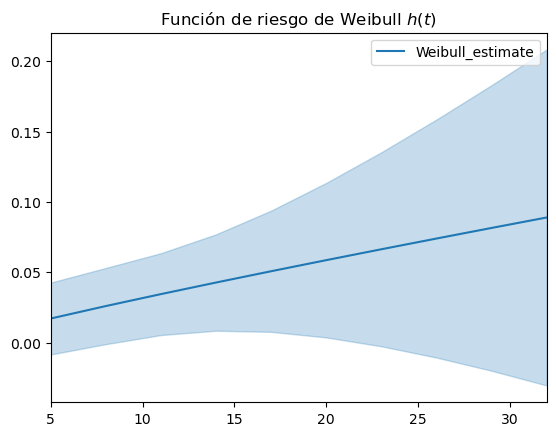

In [29]:
#Función de riesgo
mweibull.plot_hazard()
plt.title('Función de riesgo de Weibull $h(t)$')
plt.xlim(5,32);

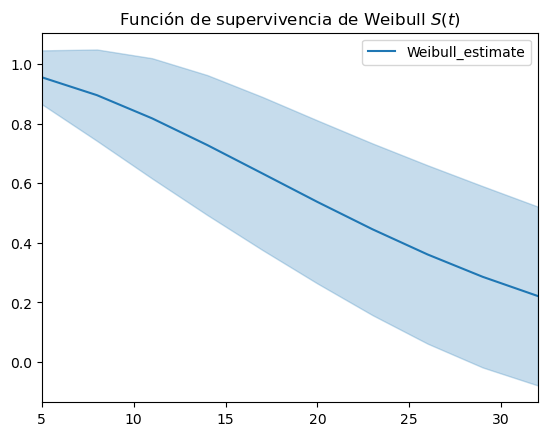

In [30]:
# Funcion de superivencia de Weibull

mweibull.plot_survival_function()
plt.title('Función de supervivencia de Weibull $S(t)$')
plt.xlim(5,32);

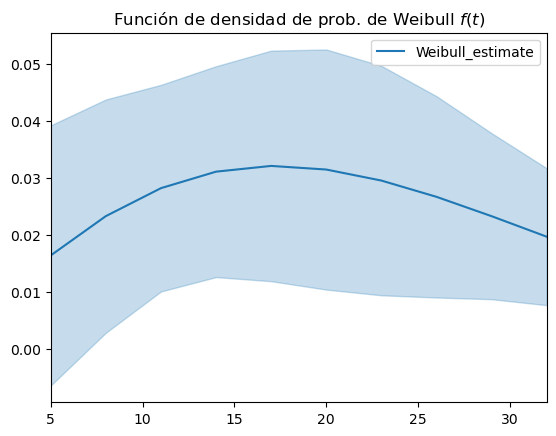

In [38]:
# f(t) Funcion de densidad 

mweibull.plot_density()
plt.title('Función de densidad de prob. de Weibull $f(t)$')
plt.xlim(5,32);

Vamos a suponer que el tiempo de supervivencia de los datos se distribuyen como una **LogNormal**

In [32]:
## # Importar el calculo de la LogNormal 

from lifelines import LogNormalFitter

In [34]:
# fit(tiempo de supervivencia, censura) sirve para estimar 

mlogn = LogNormalFitter().fit(recaida [' tiempo'], recaida [' estado'])

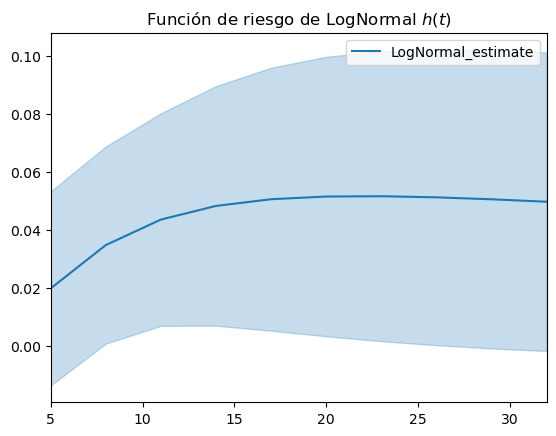

In [37]:
#Función de riesgo de la LogNormal
mlogn.plot_hazard()
plt.title('Función de riesgo de LogNormal $h(t)$')
plt.xlim(5,32);

## Va creciendo rapido y luego decrece muy lento 

In [36]:
mlogn.hazard_

,LogNormal_estimate
5.0,0.019961
8.0,0.034916
11.0,0.043704
14.0,0.048408
17.0,0.050720
20.0,0.051641
23.0,0.051744
26.0,0.051361
29.0,0.050690
32.0,0.049850


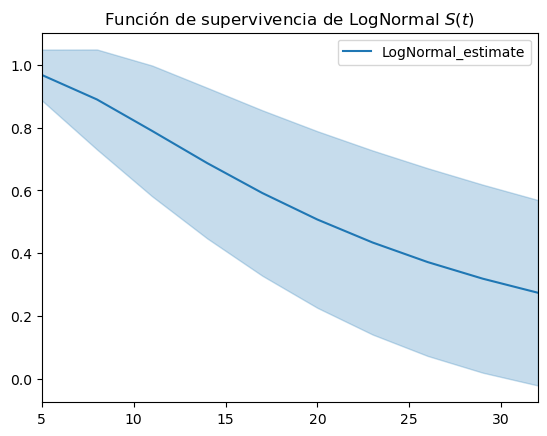

In [39]:
# Funcion de superivencia de LogNormal

mlogn.plot_survival_function()
plt.title('Función de supervivencia de LogNormal $S(t)$')
plt.xlim(5,32);

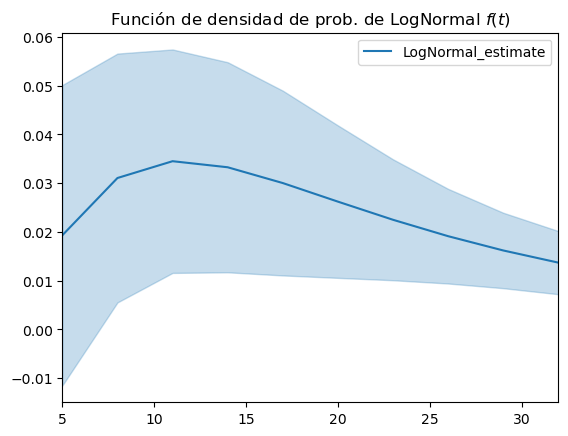

In [42]:
# f(t); Funcion de densidad de probabilidad de LogNormal

mlogn.plot_density()
plt.title('Función de densidad de prob. de LogNormal $f(t)$')
plt.xlim(5,32);

**¿El tiempo de supervivencia es exponencial, Weibull o LogNormal?**

El criterio de Akaike (Akaike Inofrmation Criteria AIC) sirve para elegir el "mejor" modelo. 

La ecuación del AIC es: 

$AIC = -2 lnVerosimilitud + 2k$

donde K : es el numero de parametros del modelo de regresión

El mejor modelo es el que tiene el menor valor de **AIC**. AIC prefieren modelos simples (sin muchos parametros)

In [49]:
# Para obtener los AIC de los 3 modelos y verificar cual es el mejor modelo
# exponen.AIC_ ,mweibull.AIC_ ,mlogn.AIC_

#Para darle formato
print('AIC por modelo')
print('Exponencial:',exponen.AIC_.round(2) ,', Weibull:', mweibull.AIC_.round(2) , ', LogNormal:',mlogn.AIC_.round(2))

AIC por modelo
Exponencial: 54.81 , Weibull: 54.16 , LogNormal: 54.51


*De acuerdo con el criterio de AIC el "mejor" modelo es el de Weibull, por lo que el tiempo de supervivencia es Weibull, el riesgo de recaída es creciente*